# KEN3450, Data Analysis, Spring 2020 

## Clinic 1: EDA of Movies 

**Błażej Dolicki - i6155906**

---

## Part 1: Loading and Cleaning with Pandas 
Here is a description of the columns (in order) present in this csv file:

```
id: a unique identifier for each movie
title: the title of the movie
cast: name of most recognizeable cast members seperated by a "|"
director: name of the director (if more than one, different names seperated by a "|"
runtime: duration of movie in min.
genres: categories of the movie seperated by a "|"
release_date: exact date of the release in the format MM/DD/YY or MM/DD/YYYY
users_voted: how many users have cast their vote for this movie
rating: average rating for the movie (scale 0-5)
release_year: the year of release
budget: production costs in US dollars
revenue: revenue income in US dollars
```

----

Load the appropriate libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Cleaning: Reading in the data

In [2]:
#Read the data into a dataframe
df = pd.read_csv("movies.csv", parse_dates=["release_date"])

In [3]:
df.head()

,id,title,cast,director,runtime,genres,release_date,users_voted,rating,release_year,budget,revenue
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,3.25,2015,150000000,1513528810
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,3.55,2015,150000000,378436354
2,262500,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,3.15,2015,110000000,295238201
3,140607,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,3.75,2015,200000000,2068178225
4,168259,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,3.65,2015,190000000,1506249360


There are more than two date formats in `release_date` column, therefore it's not possible to parse the dates with `to_datetime()` method. Thankfully, this issue is solved by adding the `parse_dates` argument - the dates are properly parsed.

### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content. 

In [4]:
df.dtypes

id                       int64
title                   object
cast                    object
director                object
runtime                  int64
genres                  object
release_date    datetime64[ns]
users_voted              int64
rating                 float64
release_year             int64
budget                   int64
revenue                  int64
dtype: object

Everything seems okay, numeric variables are indeed numeric and string variables are of type object.

In [5]:
df.shape

(10866, 12)

**B** There are 10866 movies, each with 12 features

In [6]:
df.describe()

,id,runtime,users_voted,rating,release_year,budget,revenue
count,10866.000000,10866.000000,10866.000000,10861.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,102.070863,217.389748,2.987386,2001.322658,1.462570e+07,3.982332e+07
std,92130.136561,31.381405,575.619058,0.467639,12.812941,3.091321e+07,1.170035e+08
min,5.000000,0.000000,10.000000,0.750000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,90.000000,17.000000,2.700000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,99.000000,38.000000,3.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,111.000000,145.750000,3.300000,2011.000000,1.500000e+07,2.400000e+07
max,417859.000000,900.000000,9767.000000,4.600000,2015.000000,4.250000e+08,2.781506e+09


The above method summarizes some basic statistics. It helps to make sanity checks on edge values - for example rating should be between 0 and 5. Here you can see that min value of rating is 0.75 and max value is 4.6 so this is correct. Based on common sense, none of the numerical variables should be negative - looking at the above table, it checks out. This may seem irrelevant, but even from my short work experience I can tell situations like that happen in real-life situations.

It's also worth checking any numbers that seem weird. Often this means that there's an error. For example maximum runtime is 900 which means that some movie supposedly is 15 hours long, which would be quite bizarre. After checking the title and googling it, it appears that the film was presented in 15 one-hour chapters. So everything is correct in this case.

In this dataset a really important insight is that medians of budget and revenue - i.e. half (or more) examples - are zeros. However, common sense suggests that every movie needs a non-zero budget and revenue. 

In [7]:
df[df.budget==0].sort_values(by='users_voted',ascending=False).head()

,id,title,cast,director,runtime,genres,release_date,users_voted,rating,release_year,budget,revenue
7410,4638,Hot Fuzz,Simon Pegg|Nick Frost|Timothy Dalton|Jim Broad...,Edgar Wright,121,Crime|Action|Comedy,2007-02-14,1329,3.60,2007,0,80573774
5450,122906,About Time,Rachel McAdams|Bill Nighy|Domhnall Gleeson|Tom...,Richard Curtis,123,Comedy|Drama|Science Fiction,2013-08-16,1329,3.85,2013,0,87100449
746,188161,A Million Ways to Die in the West,Seth MacFarlane|Charlize Theron|Liam Neeson|Am...,Seth MacFarlane,116,Comedy|Western,2014-05-22,1074,2.95,2014,0,0
2419,37135,Tarzan,Tony Goldwyn|Glenn Close|Minnie Driver|Brian B...,Chris Buck|Kevin Lima,88,Adventure|Animation|Drama|Family,1999-06-18,912,3.45,1999,0,0
693,200727,"Love, Rosie",Lily Collins|Sam Claflin|Suki Waterhouse|Chris...,Christian Ditter,102,Comedy|Romance,2014-07-02,904,3.80,2014,0,4439431


Thanks to the nature of this specific dataset we can use external sources (aka the Internet) to check the data. The movie "Hot Fuzz" that is on the top of the table in the cell above can be found on iMDB (https://www.imdb.com/title/tt0425112/). It's budget was 8 million pounds. So clearly many (if not all) the movies that have zeros as in the budget column in fact have missing data.

In [8]:
print("There are {} examples with missing values in the budget column".format(df[df.budget==0].shape[0]))
print("There are {} examples with missing values in the revenue column".format(df[df.revenue==0].shape[0]))
print("There are {} examples with missing values in both budget or revenue columns".format(df[(df.budget>0) | (df.revenue>0)].shape[0]))

There are 5696 examples with missing values in the budget column
There are 6016 examples with missing values in the revenue column
There are 6165 examples with missing values in both budget or revenue columns


**How to handle this problem?** If we wanted to train the model on this data, I would probably impute the missing values with predictions from an estimator trained on examples with non-missing budget and revenue (given that we have several thousands of those). However, for data analysis like this one, I will stick to the original dataset and only filter out rows with missing data in some cases when it makes sense.

After working for some time with this notebook I realized that "The Karate Kid, Part II" has supposedly budget of 113 dollars. So let us make the cutoff point around 1000, that seems reasonable.

In [9]:
df_filtered = df[(df.budget>1000) & (df.revenue>0)]

### Cleaning: Examining the dataframe - a deeper look

In [10]:
df.isna().sum()

id               0
title            0
cast            76
director        44
runtime          0
genres          23
release_date     0
users_voted      0
rating           5
release_year     0
budget           0
revenue          0
dtype: int64

As mentioned in the docs, the `describe()` method excludes NaN values when computing statistics.

### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)?

Think of the techniques we discussed during lecture and apply it below. Remember that there is no golden rule about which technique is best, as long as you as an experienced data scientist report how you handled them.

For the purpose of data exploration, I think the best choice is to use a separate "Unknown" class for categorical variables. This is a common choice in many visualizations. Substituting missing values with the most common categories etc. might significantly change the dataset. For `rating` we can just replace it with the mean, it's only 5 rows anyway...

In [11]:
df[['cast','director','genres']] = df[['cast','director','genres']].fillna("Unknown")

In [12]:
df['rating'].fillna(df['rating'].mean(),inplace=True)

It's always good to check if the code is actually doing what you think it is doing...

In [13]:
print("Any missing values left?",df.isna().sum().any())

Any missing values left? False


##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated movies? To determine this, you'll only need the data in two columns: `title` and `rating`. The task will be to sort these two columns by the value in `rating`.

Try to formulate questions that you can explain to non-scientists and use your imagination (e.g. look for your favorite actor or movie)

[5 min]

In [14]:
df.head()

,id,title,cast,director,runtime,genres,release_date,users_voted,rating,release_year,budget,revenue
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,3.25,2015,150000000,1513528810
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,3.55,2015,150000000,378436354
2,262500,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,3.15,2015,110000000,295238201
3,140607,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,3.75,2015,200000000,2068178225
4,168259,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,3.65,2015,190000000,1506249360


### Questions
1. Which actor has the best average movie rating?
2. Which director made the most movies?
3. Is there a correlation betwen release date and revenue? Are there any periods especially beneficial for releasing a movie? (For example winter, when days are short and it's cold outside)
4. Is there a correlation between the budget and revenue? (Intuitively, there should be a positive correlation)
5. Is there a correlation between the revenue and the rating? (Theoretically, revenue means a lot of people saw the film -> a lot of people recommended the film -> the film is good)

---

## Part 3: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms or other visualizations. Do you find anything interesting or strange? Report it.


[20 minutes]

---

Choose the numerical (quantitative) columns to generate some histograms.

In [15]:
num_cols = ['runtime','users_voted','release_year','budget','revenue']

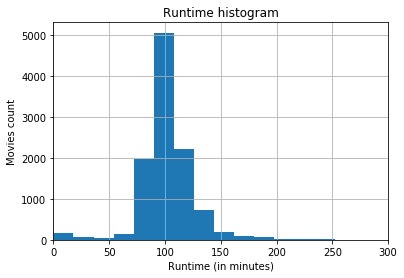

In [16]:
df.runtime.hist(bins=50)
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Movies count')
plt.title('Runtime histogram')
plt.xlim((0,300))
plt.show()

We can see that the histogram is unimodal, skewed right. Most of the movies are between 1 and 3 hours long, which seems plausible.

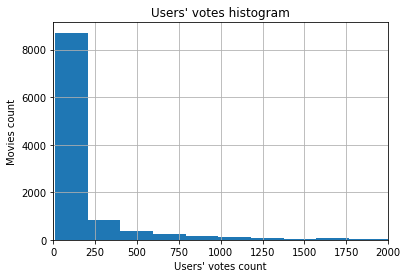

In [17]:
df.users_voted.hist(bins=50)
plt.xlabel('Users\' votes count')
plt.ylabel('Movies count')
plt.title('Users\' votes histogram')
plt.xlim((0,2000))
plt.show()

Seems that the majority of movies don't have any votes, the distribution is similar to exponential, but even steeper. Let's zoom in a bit more.

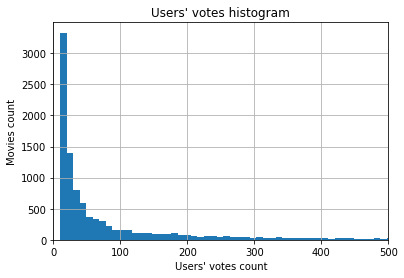

In [18]:
df.users_voted.hist(bins=1000)
plt.xlabel('Users\' votes count')
plt.ylabel('Movies count')
plt.title('Users\' votes histogram')
plt.xlim((0,500))
plt.show()

In [19]:
df[df.users_voted<20].shape[0]

3330

After having a closer look, we can see that every movie has some votes, but 3330 (about 1/3 of the whole dataset) of them has less than 20 votes

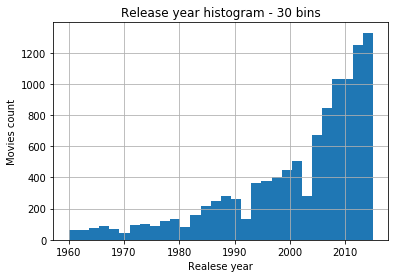

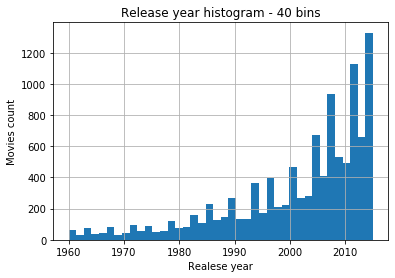

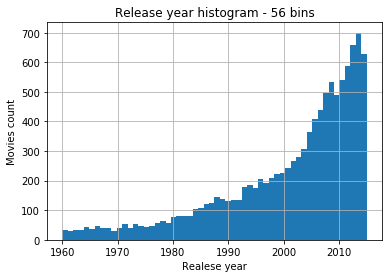

In [20]:
unique_years = df.release_year.nunique()
for num_bins in [30,40,unique_years]:
    df.release_year.hist(bins=num_bins)
    plt.xlabel('Realese year')
    plt.ylabel('Movies count')
    plt.title('Release year histogram - {} bins'.format(num_bins))
    plt.show()

For `release year` the shape of the plot differs a lot depending on the selected bin size. First diagram has a few sudden drops. Conversely, on the second one we can observe multiple significant spikes and the last one in which there is one bin per year displays a much smoother distribution. Despite the differences, all plots render an increasing number of movies made over time. This does not necessarily mean that in general less movies were made in earlier years, because it might be that for newer movie it is easier to obtain the data and that is why they are better represented in the dataset.

In [21]:
df_filtered.shape

(3833, 12)

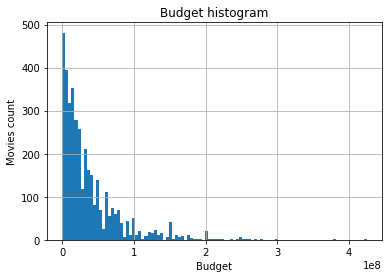

In [22]:
df_filtered.budget.hist(bins=100)
plt.xlabel('Budget')
plt.ylabel('Movies count')
plt.title('Budget histogram')
plt.show()

Of course, the movie count decreases as the budget increases.

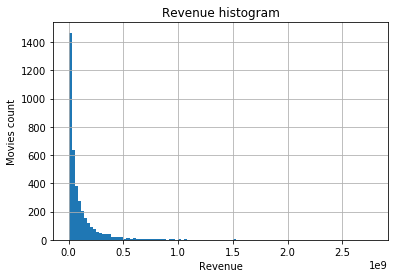

In [23]:
df_filtered.revenue.hist(bins=100)
plt.xlabel('Revenue')
plt.ylabel('Movies count')
plt.title('Revenue histogram')
# plt.ylim((0,1000))
plt.show()

## Part 4: Basic associations

After we have inspected the individual values, it's time to start checking combinations of events, e.g. does the rating correlate with the budget or the revenue? Does the budget correlate with revenue? Analyze what your findings mean

[20 minutes]

---

Especially for big datasets when inspecting correlations with scatterplots, it's important to increase transparency of ticks with the alpha parameter. This is a common practice for data visualization in many Kaggle competitions. Otherwise, ticks are overlapping each other and it's really difficult to read anything from the plots.

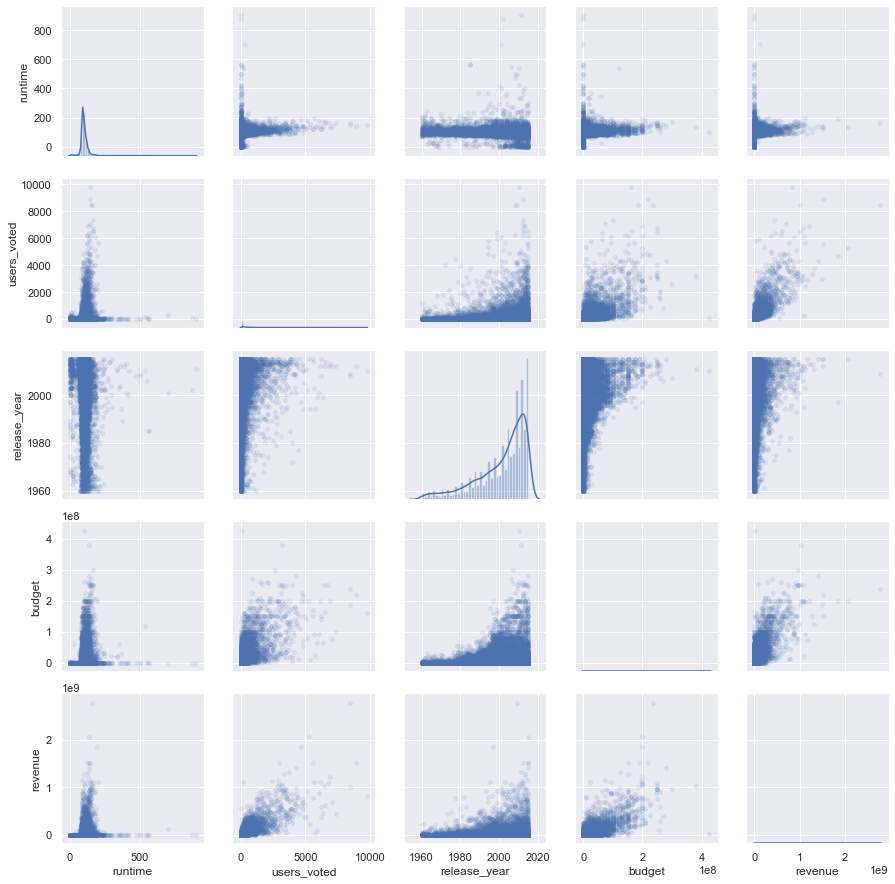

In [24]:
sns.set()
g = sns.PairGrid(df, vars=num_cols)
g.map_diag(sns.distplot)
g.map_offdiag(plt.scatter, s=15,alpha=0.1)

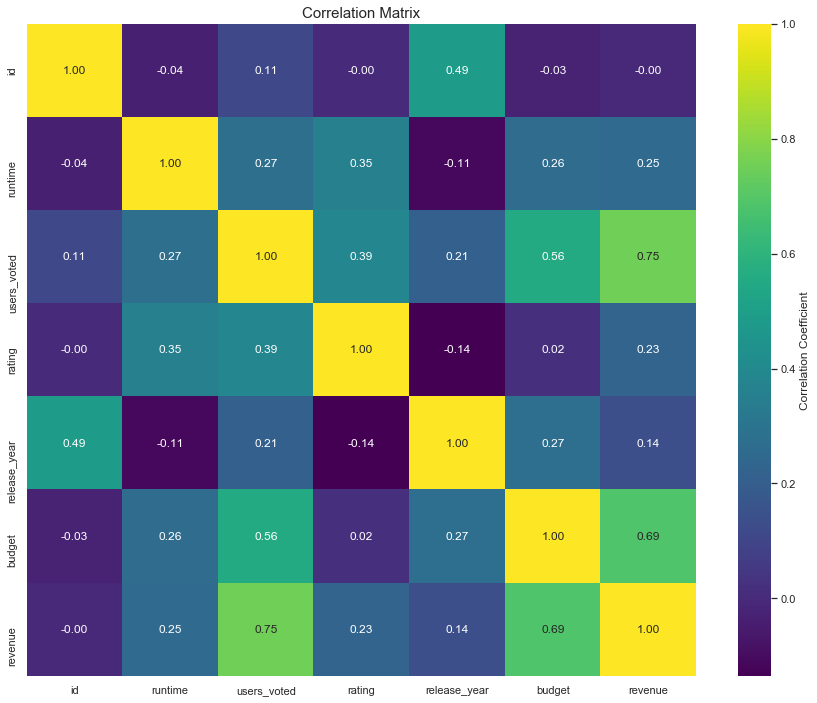

In [25]:
f, ax = plt.subplots(figsize= [15,12])
sns.heatmap(df_filtered.corr(), annot=True, fmt=".2f", ax=ax, 
            cbar_kws={'label': 'Correlation Coefficient'}, cmap='viridis')
ax.set_title("Correlation Matrix", fontsize=15)
plt.show()

A correlation heatmap is more informative. Here we can clearly see that there is a strong positive correlation between budget, revenue and users_voted. This is not surprising. The more money was invested into a film, the more the movie should earn to make a profit. Similarly the higher the budget, the better promotion, thus more viewers and thus more votes. Apart from that, there are no strong correlations. Interestingly enough, there is a small correlation of 0.25 between users_voted and rating, which may lead to a conclusion that popularity doesn't always go together with positive reception of the audience.<br><br>
Here I am using `df` instead of `df_filtered` because a correlation based on 10k examples is much more reliable than on 4k examples. The only precaution we need to bear in mind is that correlations between revenue (and budget) and other variables are a bit biased. However, after plotting a heatmap for `df_filtered` I checked that the differences beetween them are not signficant.

Let's make a table with sorted correlations, to make sure we didn't overlook anything. It's important to pay close attention both to the top (strongest positive correlations) and to the bottom (strongest negative correlations) of the table. In this dataset, there are no strong negative correlations.

In [26]:
cols = df.corr().columns
corrs = {'col1':[],'col2':[],'corr':[]}
for i in range(len(cols)):
    for j in range(len(cols)):
#         It's a symmetric matrix which leads to repeated values. We can avoid the duplicated using the following if statement
        if i>j:
            corrs['col1'].append(cols[i])
            corrs['col2'].append(cols[j])
            corrs['corr'].append(df.corr().iat[i,j])
        
corrs = pd.DataFrame.from_dict(corrs).sort_values(by='corr',ascending=False)
corrs

,col1,col2,corr
17,revenue,users_voted,0.791175
20,revenue,budget,0.734901
12,budget,users_voted,0.632702
6,release_year,id,0.511364
5,rating,users_voted,0.253795
11,budget,runtime,0.191283
18,revenue,rating,0.172538
2,users_voted,runtime,0.163278
16,revenue,runtime,0.162838
4,rating,runtime,0.156745


In [27]:
df.columns

Index(['id', 'title', 'cast', 'director', 'runtime', 'genres', 'release_date', 'users_voted', 'rating', 'release_year', 'budget', 'revenue'], dtype='object')


## Part 5:  Determining the Most Successful Movies 

Roughly speaking, we can say that `rating` is a proxy for quality of a movie and profit (`revenue`-`budget`) indicates popularity and financial success. Thus a natural choice would be to combine these two. However, a profit of 200 thousand euros is an incredible success for some indie movie with a budget of 20 thousand euros, but quite a disappointment for a blockbuster with a few million dollars budget. This is why instead of a difference, it is smarter to use a quotient (revenue divided by budget). <br>

To compare different approaches we will try multiple methods of calculating success. Unfortunately, for this analysis we need to discard movies with missing values in revenue and budget.

---

For example, we can determine the "best successful" movie by year! Determine the best movie in each year.

In [28]:
df_filtered['income'] = df_filtered.revenue-df_filtered.budget
df_filtered['relative_income'] = df_filtered.revenue/df_filtered.budget
df_filtered['relative_income*rating'] = df_filtered['relative_income']*df_filtered['rating']

D:\Blazej\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Blazej\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Blazej\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [29]:
#Using .groupby, we can divide the dataframe into subsets by the values of 'year'.
#We can then iterate over these subsets
best_movies = {"year":[],"#movies":[],"rating":[],"income":[],"relative_income":[],"relative_income*rating":[]}
for year, year_df in df_filtered.groupby('release_year'):
    for key in best_movies:
        if key=="year":
            best_movies[key].append(year)
        elif key=="#movies":
            best_movies[key].append(df_filtered.release_year.value_counts()[year])
        else:
            best_movie_index = year_df[key].idxmax()
            best_movie_title = year_df.at[best_movie_index,"title"]
            best_movies[key].append(best_movie_title)

best_movies = pd.DataFrame.from_dict(best_movies)

In [30]:
best_movies

,year,#movies,rating,income,relative_income,relative_income*rating
0,1960,5,Psycho,Spartacus,Psycho,Psycho
1,1961,10,"One, Two, Three",One Hundred and One Dalmatians,One Hundred and One Dalmatians,One Hundred and One Dalmatians
2,1962,7,To Kill a Mockingbird,Dr. No,Dr. No,Dr. No
3,1963,6,Charade,From Russia With Love,From Russia With Love,From Russia With Love
4,1964,7,Dr. Strangelove or: How I Learned to Stop Worr...,Goldfinger,Goldfinger,Goldfinger
5,1965,5,The Sound of Music,The Sound of Music,The Sound of Music,The Sound of Music
6,1966,5,Who's Afraid of Virginia Woolf?,Who's Afraid of Virginia Woolf?,Who's Afraid of Virginia Woolf?,Who's Afraid of Virginia Woolf?
7,1967,13,Bonnie and Clyde,The Jungle Book,The Jungle Book,The Jungle Book
8,1968,9,2001: A Space Odyssey,2001: A Space Odyssey,Rosemary's Baby,Rosemary's Baby
9,1969,4,The Wild Bunch,Butch Cassidy and the Sundance Kid,Butch Cassidy and the Sundance Kid,Butch Cassidy and the Sundance Kid


If we wanted to go further, we could pick up the best film by selecting the film that is the best in the largest number of criteria, for example for 2015 "The Gallows" is the only movie that is the most successful in two criteria.<br>
Now that we know the titles, let's see how the scores changed over years.

In [31]:
year_df['income'].max()

1868178225

In [32]:
# df_filtered["income*rating"] = df_filtered.income*df_filtered.rating/5

In [33]:
best_movies_values = {"year":[],"#movies":[],"rating":[],"income":[],"relative_income":[],"relative_income*rating":[]}
for year, year_df in df_filtered.groupby('release_year'):
    for key in best_movies_values:
        if key=="year":
            best_movies_values[key].append(year)
        elif key=="#movies":
            best_movies_values[key].append(df_filtered.release_year.value_counts()[year])
        else:
            best_movies_values[key].append(year_df[key].max())

best_movies_values = pd.DataFrame.from_dict(best_movies_values)

In [34]:
best_movies_values

,year,#movies,rating,income,relative_income,relative_income*rating
0,1960,5,4.00,48000000,39.655591,158.622365
1,1961,10,3.75,211880014,53.970003,178.101012
2,1962,7,3.85,58500000,54.181818,181.509091
3,1963,6,3.75,76398765,31.559506,105.724345
4,1964,7,3.85,121400000,35.685714,124.900000
5,1965,5,3.60,155014286,19.904181,71.655052
6,1966,5,3.75,26236689,4.498225,16.868344
7,1967,13,3.80,201843612,51.460903,180.113160
8,1968,9,3.85,44715371,10.436071,38.091658
9,1969,4,3.60,96308889,17.051482,59.680185


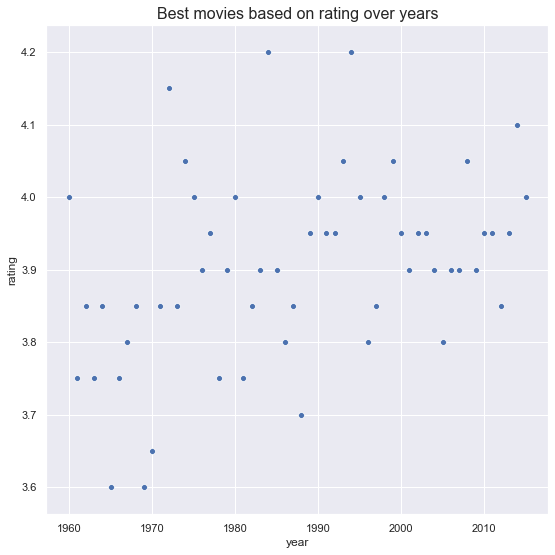

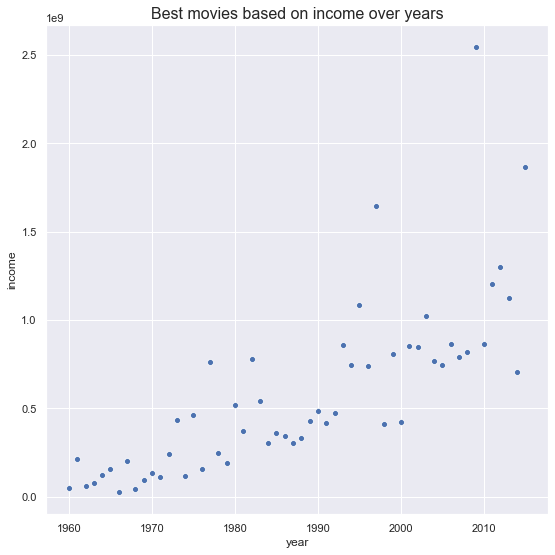

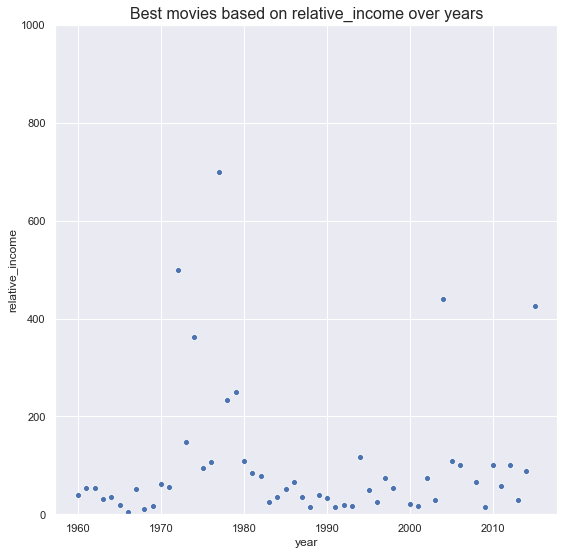

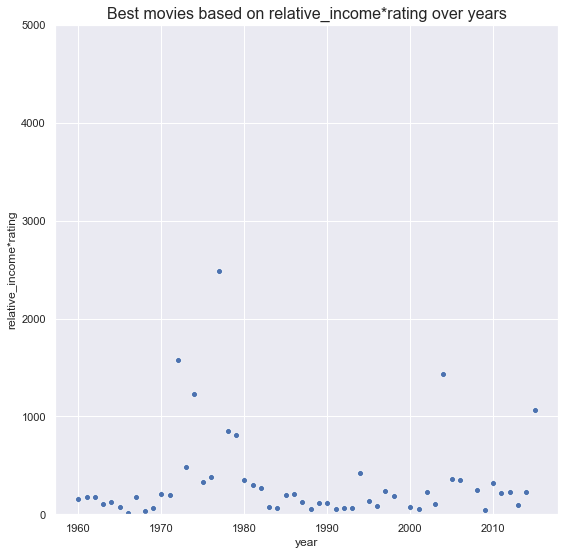

In [35]:
def plot_best_movies_over_time(criterium,y_range=None):
    plt.figure(figsize=(9,9))
    plt.title("Best movies based on "+criterium+" over years",fontsize=16)
    if y_range:
        plt.ylim(y_range)
    sns.scatterplot(x='year',y=criterium,data=best_movies_values)
    
criteria = ["rating","income","relative_income","relative_income*rating"]
y_ranges = [None,None,(0,1000),(0,5000)]
for i,c in enumerate(criteria):
    plot_best_movies_over_time(c,y_ranges[i])

In [36]:
best_movies_values.corr().year

year                      1.000000
#movies                   0.944424
rating                    0.383969
income                    0.767638
relative_income           0.189327
relative_income*rating    0.185981
Name: year, dtype: float64

We can see number of movies produced and income have been steadily increasing over time (strong correlation), however the rest of variables has quitew weak correlations with time. This is plausible because nowadays the budgets are much larger than a few decades ago, but so are the revenues, so the proportion stays roughly similar. Also a movie rated 4 out of 5 in 1967 might be in fact worse than 4/5 movie in 2010 because the expectations and taste changed since then.

## Part 6:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Do you reach the same conclusions if you use as indication of popularity the revenue or the rating?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?

[20 minutes]

---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

In [37]:
unique_genres = []
for g in df.genres.unique():
    for genre in g.split("|"):
        if genre not in unique_genres:
            unique_genres.append(genre)
unique_genres

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Unknown',
 'Foreign']

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [38]:
for genre in unique_genres:
    df["is_"+genre] = df.genres.str.contains(genre)
df.columns

Index(['id', 'title', 'cast', 'director', 'runtime', 'genres', 'release_date', 'users_voted', 'rating', 'release_year', 'budget', 'revenue', 'is_Action', 'is_Adventure', 'is_Science Fiction', 'is_Thriller', 'is_Fantasy', 'is_Crime', 'is_Western', 'is_Drama', 'is_Family', 'is_Animation', 'is_Comedy', 'is_Mystery', 'is_Romance', 'is_War', 'is_History', 'is_Music', 'is_Horror', 'is_Documentary', 'is_TV Movie', 'is_Unknown', 'is_Foreign'], dtype='object')

Now explore some ways to visualize the genres represented in the dataframe. 

For example, you might ask which is the most represented genre.

In [39]:
genres_columns = ["is_"+genre for genre in unique_genres]

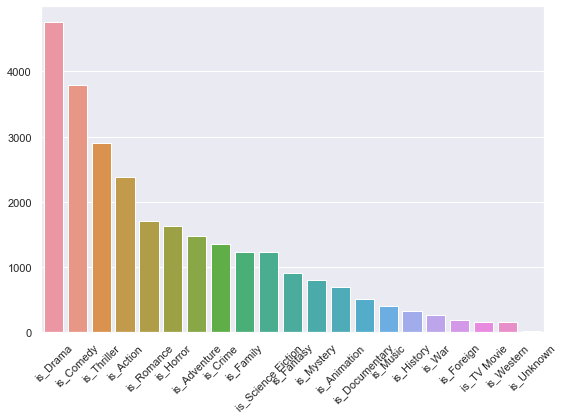

In [65]:
genres_counts = df.loc[:, genres_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(9,6))
plt.xticks(rotation=45)
sns.barplot(x=genres_counts.index,y=genres_counts.values)
plt.show()

In [57]:
def genres_fun(relative=False):
    genres_by_year = {"year":[]}

    for g in genres_columns:
        genres_by_year[g] = []

    for year, year_df in df.groupby('release_year'):
        for key in genres_by_year:
            if key=="year":
                genres_by_year[key].append(year)
            else:
                if relative:
                    genres_by_year[key].append(year_df[key].sum()/year_df[key].shape[0])
                else:
                    genres_by_year[key].append(year_df[key].sum())

    genres_by_year = pd.DataFrame.from_dict(genres_by_year)
    return genres_by_year

In [50]:
import plotly.express as px

In [87]:
import plotly.graph_objects as go

def plot_genres(genres_by_year,title="Genre popularity over years", columns=genres_columns):
    fig = go.Figure()
    for col in genres_columns:
        if col in columns:
            fig.add_trace(go.Scatter(x=genres_by_year.year, y=genres_by_year[col],mode='lines',name=col))
    fig.update_layout(title={
            'text': title,
            'x':0.5})
    fig.show()

In [131]:
genres_by_year = genres_fun()
plot_genres(genres_by_year)

In [123]:
rel_genres_by_year = genres_fun(relative=True)
plot_genres(rel_genres_by_year,title="Relative genre popularity over years")

In [130]:
top5_popular = list(genres_counts.index[:5])

plot_genres(rel_genres_by_year,title="Relative genre popularity - top 5 genres", columns=top5_popular)

In [129]:
interesting_trends = ['is_Romance','is_Adventure','is_Horror','is_Fantasy','is_Western','is_History','is_Comedy']
plot_genres(rel_genres_by_year,title="Interesting trends", columns=interesting_trends)

### Part 6.1: What can you conclude from the above visualizations?
[15 min]

Pick two or three genres and describe how the popularity of these genres fluctuates with time.  

#### Insights:
* Romance drops in 70s, then rises and drops again since 2000. 
* Adventure also decreases since in the new millenium. 
* Horror - drop in mid-60s for almost a decade, since late 70s until 1990 was a good period for horror and then substnatial drop, rising again in recent years. 
* Fantasy was very unstable, peak in 1982 and since then a steady decrease. 
* Western quite popular before 80s. 
* History continuously dropping until leveling out in mid-80s. Documentary sky-rocketing since 90s. 
* Comedy rised in years 1980-2000 and dropping since then.

## Part 7: Conclusions

[15 min/remaining time]


Summarize your conclusions here by highlighting some of your achievements. Make sure to answer both parts below

### 7.1 Limitations
Are there any specific limitations in this dataset? Can we consider it complete? Is it noisy? Are there any ethical concerns?

### 7.2 Main findings
Summarize your findings below